# Topic modelling to classify documents using LDA

In [1]:
import pandas as pd
import json
import numpy as np

### Load Google drive directory

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load the csv file

In [3]:
#documents = pd.DataFrame(data)
documents = pd.read_csv("/content/gdrive/My Drive/trainldaf.csv")
print(documents[:5])
topic=['Topic1','Topic2','Topic3','Topic4','Topic5']
prob =['Prob1','Prob2', 'Prob3', 'Prob4','Prob5']
for i in range(len(topic)):
    documents[topic[i]]=np.nan
    documents[prob[i]]=np.nan
print(documents[:5])

   Index  _id                                               text
0      1    1    Predictive models allow subject-specific inf...
1      2    2    Rotation invariance and translation invarian...
2      3    3    We introduce and develop the notion of spher...
3      4    4    The stochastic Landau--Lifshitz--Gilbert (LL...
4      5    5    Fourier-transform infra-red (FTIR) spectra o...
   Index  _id                                               text  Topic1  \
0      1    1    Predictive models allow subject-specific inf...     NaN   
1      2    2    Rotation invariance and translation invarian...     NaN   
2      3    3    We introduce and develop the notion of spher...     NaN   
3      4    4    The stochastic Landau--Lifshitz--Gilbert (LL...     NaN   
4      5    5    Fourier-transform infra-red (FTIR) spectra o...     NaN   

   Prob1  Topic2  Prob2  Topic3  Prob3  Topic4  Prob4  Topic5  Prob5  
0    NaN     NaN    NaN     NaN    NaN     NaN    NaN     NaN    NaN  
1    NaN   

In [4]:
documents.head(2)

,Index,_id,text,Topic1,Prob1,Topic2,Prob2,Topic3,Prob3,Topic4,Prob4,Topic5,Prob5
0,1,1,Predictive models allow subject-specific inf...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Rotation invariance and translation invarian...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(2018)

In [10]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [11]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [12]:
# Preprocess the data
processed_docs = documents['text'].map(preprocess)
processed_docs.head(5)

0    [predict, model, allow, subject, specif, infer...
1    [rotat, invari, translat, invari, great, valu,...
2    [introduc, develop, notion, spheric, polyharmo...
3    [stochast, landau, lifshitz, gilbert, equat, c...
4    [fourier, transform, infra, ftir, spectra, sam...
Name: text, dtype: object

In [13]:
processed_docs.head(5)

0    [predict, model, allow, subject, specif, infer...
1    [rotat, invari, translat, invari, great, valu,...
2    [introduc, develop, notion, spheric, polyharmo...
3    [stochast, landau, lifshitz, gilbert, equat, c...
4    [fourier, transform, infra, ftir, spectra, sam...
Name: text, dtype: object

### Bag of words on the dataset

In [14]:
dictionary = gensim.corpora.Dictionary(processed_docs)
# Saving the dictionary
dictionary.save('dictionary.gensim')

In [15]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 accuraci
1 adni
2 aim
3 algorithm
4 allow
5 alter
6 alzheim
7 amyloid
8 analys
9 analyz
10 approach


In [16]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=50000)

In [17]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# Saving the corpus
import pickle
pickle.dump(bow_corpus, open('bow_corpus.pkl', 'wb'))
bow_corpus[150]

[(21, 3),
 (28, 1),
 (44, 1),
 (49, 1),
 (50, 1),
 (56, 1),
 (73, 1),
 (81, 1),
 (101, 2),
 (109, 2),
 (115, 1),
 (118, 1),
 (124, 1),
 (132, 1),
 (182, 1),
 (202, 2),
 (203, 1),
 (208, 2),
 (254, 1),
 (270, 1),
 (299, 1),
 (310, 1),
 (318, 3),
 (345, 1),
 (350, 1),
 (352, 1),
 (360, 1),
 (404, 1),
 (407, 1),
 (439, 1),
 (444, 2),
 (477, 1),
 (480, 1),
 (488, 1),
 (490, 1),
 (654, 5),
 (679, 1),
 (713, 1),
 (830, 1),
 (917, 1),
 (938, 1),
 (949, 1),
 (955, 1),
 (968, 3),
 (972, 1),
 (991, 1),
 (993, 1),
 (996, 1),
 (1040, 1),
 (1047, 1),
 (1051, 2),
 (1180, 1),
 (1239, 1),
 (1240, 2),
 (1247, 3),
 (1253, 1),
 (1301, 2),
 (1362, 1),
 (1439, 1),
 (1514, 2),
 (1551, 1),
 (1556, 1),
 (1587, 1),
 (1734, 1),
 (1822, 1),
 (1831, 1),
 (1954, 1),
 (2058, 1),
 (2059, 1),
 (2066, 1),
 (2121, 1),
 (2122, 1),
 (2123, 1),
 (2124, 1),
 (2125, 1),
 (2126, 1),
 (2127, 1),
 (2128, 1),
 (2129, 1)]

In [18]:
bow_doc_1500 = bow_corpus[150]

for i in range(len(bow_doc_1500)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1500[i][0], 
                                                     dictionary[bow_doc_1500[i][0]], 
                                                     bow_doc_1500[i][1]))

Word 21 ("data") appears 3 time.
Word 28 ("direct") appears 1 time.
Word 44 ("generat") appears 1 time.
Word 49 ("improv") appears 1 time.
Word 50 ("individu") appears 1 time.
Word 56 ("level") appears 1 time.
Word 73 ("particular") appears 1 time.
Word 81 ("propos") appears 1 time.
Word 101 ("architectur") appears 2 time.
Word 109 ("learn") appears 2 time.
Word 115 ("paper") appears 1 time.
Word 118 ("recognit") appears 1 time.
Word 124 ("translat") appears 1 time.
Word 132 ("develop") appears 1 time.
Word 182 ("time") appears 1 time.
Word 202 ("machin") appears 2 time.
Word 203 ("make") appears 1 time.
Word 208 ("process") appears 2 time.
Word 254 ("possibl") appears 1 time.
Word 270 ("chang") appears 1 time.
Word 299 ("address") appears 1 time.
Word 310 ("environ") appears 1 time.
Word 318 ("increas") appears 3 time.
Word 345 ("context") appears 1 time.
Word 350 ("high") appears 1 time.
Word 352 ("impact") appears 1 time.
Word 360 ("potenti") appears 1 time.
Word 404 ("base") appear

### TF-IDF

In [19]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)

In [20]:
corpus_tfidf = tfidf[bow_corpus]

In [21]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.04480517911086714),
 (1, 0.061456962892085985),
 (2, 0.02770820186099269),
 (3, 0.035970680135387595),
 (4, 0.0858365866514374),
 (5, 0.21970214053006895),
 (6, 0.06010135434695343),
 (7, 0.0440571817357302),
 (8, 0.0251798060922578),
 (9, 0.0570310496164714),
 (10, 0.04481695419383753),
 (11, 0.05303024447101651),
 (12, 0.07755484087063615),
 (13, 0.12278576362688469),
 (14, 0.0847567275752202),
 (15, 0.21709437829369346),
 (16, 0.0333363804249345),
 (17, 0.07482790661970028),
 (18, 0.10762255740322424),
 (19, 0.04913845911321858),
 (20, 0.11045466328254697),
 (21, 0.18313267237752462),
 (22, 0.07151698594390492),
 (23, 0.0815044946925878),
 (24, 0.03009455982810629),
 (25, 0.2551900633518117),
 (26, 0.0859766463750317),
 (27, 0.02695254337117091),
 (28, 0.03780327662330683),
 (29, 0.22601586955413702),
 (30, 0.0706568463938093),
 (31, 0.05771255323275502),
 (32, 0.04565029876966566),
 (33, 0.033207128963737974),
 (34, 0.03958628737327542),
 (35, 0.06058158976703328),
 (36, 0.0

### LDA

P(w|t),
P(t|d),
P(w|t,d)=P(w|t)*P(t|d)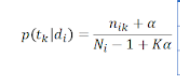
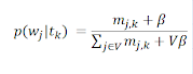
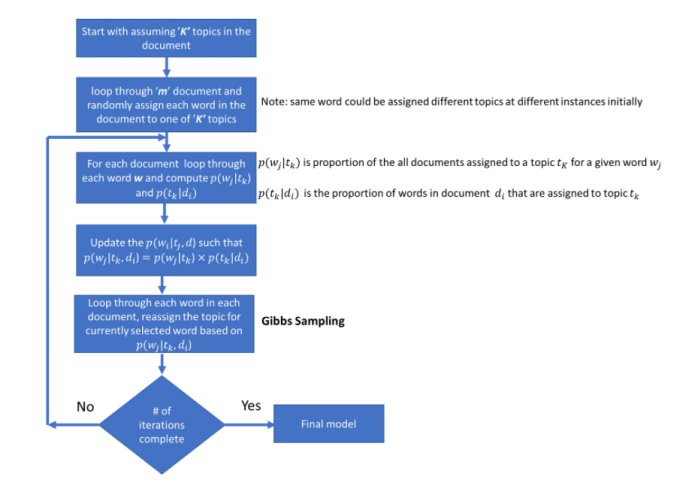

### Running LDA using Bag of Words

In [22]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2, random_state= 2)
# Saving the model
lda_model.save('lda_model.gensim')

In [23]:
print(lda_model)

LdaModel(num_terms=4407, num_topics=5, decay=0.5, chunksize=2000)


In [24]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.021*"network" + 0.017*"model" + 0.014*"learn" + 0.010*"data" + 0.009*"method" + 0.008*"propos" + 0.008*"train" + 0.007*"neural" + 0.007*"base" + 0.007*"imag"
Topic: 1 
Words: 0.007*"model" + 0.007*"field" + 0.006*"observ" + 0.006*"result" + 0.005*"time" + 0.005*"energi" + 0.005*"studi" + 0.005*"phase" + 0.005*"state" + 0.005*"effect"
Topic: 2 
Words: 0.016*"algorithm" + 0.014*"problem" + 0.011*"estim" + 0.011*"data" + 0.010*"method" + 0.009*"optim" + 0.009*"model" + 0.008*"propos" + 0.008*"function" + 0.008*"result"
Topic: 3 
Words: 0.017*"model" + 0.011*"data" + 0.011*"method" + 0.009*"base" + 0.009*"propos" + 0.008*"approach" + 0.008*"time" + 0.007*"test" + 0.006*"perform" + 0.006*"paper"
Topic: 4 
Words: 0.010*"result" + 0.010*"space" + 0.008*"problem" + 0.007*"group" + 0.007*"model" + 0.007*"general" + 0.007*"paper" + 0.007*"function" + 0.007*"graph" + 0.007*"prove"


### Running LDA using TF-IDF

In [25]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=4, random_state=2)
# Saving the model
lda_model.save('lda_model_tf_idf.gensim')

In [26]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"network" + 0.004*"model" + 0.004*"learn" + 0.003*"imag" + 0.003*"data" + 0.003*"train" + 0.003*"method" + 0.003*"state" + 0.003*"neural" + 0.003*"magnet"
Topic: 1 Word: 0.004*"mathbb" + 0.004*"group" + 0.004*"algebra" + 0.003*"star" + 0.003*"space" + 0.003*"prove" + 0.003*"mathcal" + 0.003*"field" + 0.003*"equat" + 0.002*"function"
Topic: 2 Word: 0.005*"algorithm" + 0.004*"problem" + 0.004*"estim" + 0.004*"function" + 0.004*"method" + 0.004*"model" + 0.003*"data" + 0.003*"distribut" + 0.003*"optim" + 0.003*"graph"
Topic: 3 Word: 0.005*"model" + 0.005*"estim" + 0.004*"data" + 0.004*"method" + 0.003*"test" + 0.003*"propos" + 0.003*"approach" + 0.003*"algorithm" + 0.003*"distribut" + 0.003*"time"
Topic: 4 Word: 0.004*"robot" + 0.004*"learn" + 0.004*"algorithm" + 0.004*"network" + 0.003*"agent" + 0.003*"control" + 0.003*"optim" + 0.003*"model" + 0.003*"game" + 0.003*"problem"


### Classification of the topics
### Performance evaluation by classifying sample document using LDA Bag of Words model


In [27]:
processed_docs[150]

['increas',
 'commodit',
 'vision',
 'speech',
 'recognit',
 'machin',
 'translat',
 'system',
 'widespread',
 'deploy',
 'learn',
 'base',
 'technolog',
 'digit',
 'advertis',
 'intellig',
 'infrastructur',
 'artifici',
 'intellig',
 'move',
 'research',
 'lab',
 'product',
 'chang',
 'possibl',
 'unpreced',
 'level',
 'data',
 'comput',
 'methodolog',
 'advanc',
 'machin',
 'learn',
 'innov',
 'system',
 'softwar',
 'architectur',
 'broad',
 'access',
 'technolog',
 'generat',
 'system',
 'promis',
 'acceler',
 'develop',
 'increas',
 'impact',
 'live',
 'frequent',
 'interact',
 'make',
 'mission',
 'critic',
 'decis',
 'behalf',
 'high',
 'person',
 'context',
 'realiz',
 'promis',
 'rais',
 'daunt',
 'challeng',
 'particular',
 'need',
 'system',
 'time',
 'safe',
 'decis',
 'unpredict',
 'environ',
 'robust',
 'sophist',
 'adversari',
 'process',
 'increas',
 'amount',
 'data',
 'organ',
 'individu',
 'compromis',
 'confidenti',
 'challeng',
 'exacerb',
 'moor',
 'constrain',
 'd

In [28]:
for index, score in sorted(lda_model[bow_corpus[150]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8299204111099243	 
Topic: 0.021*"network" + 0.017*"model" + 0.014*"learn" + 0.010*"data" + 0.009*"method" + 0.008*"propos" + 0.008*"train" + 0.007*"neural" + 0.007*"base" + 0.007*"imag"

Score: 0.16394580900669098	 
Topic: 0.017*"model" + 0.011*"data" + 0.011*"method" + 0.009*"base" + 0.009*"propos" + 0.008*"approach" + 0.008*"time" + 0.007*"test" + 0.006*"perform" + 0.006*"paper"


### Performance evaluation by classifying sample document using LDA TF-IDF model

In [29]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1500]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5927186012268066	 
Topic: 0.004*"mathbb" + 0.004*"group" + 0.004*"algebra" + 0.003*"star" + 0.003*"space" + 0.003*"prove" + 0.003*"mathcal" + 0.003*"field" + 0.003*"equat" + 0.002*"function"

Score: 0.3973928689956665	 
Topic: 0.005*"network" + 0.004*"model" + 0.004*"learn" + 0.003*"imag" + 0.003*"data" + 0.003*"train" + 0.003*"method" + 0.003*"state" + 0.003*"neural" + 0.003*"magnet"


### Testing model on seen document

In [30]:
bow_vector = dictionary.doc2bow(preprocess(documents['text'][3]))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.41279223561286926	 Topic: 0.016*"algorithm" + 0.014*"problem" + 0.011*"estim" + 0.011*"data" + 0.010*"method"
Score: 0.31288954615592957	 Topic: 0.007*"model" + 0.007*"field" + 0.006*"observ" + 0.006*"result" + 0.005*"time"
Score: 0.2675166726112366	 Topic: 0.010*"result" + 0.010*"space" + 0.008*"problem" + 0.007*"group" + 0.007*"model"


### Updating the topic and probability columns with respective values in decreasing order

In [31]:
for index in range(len(documents)):
    topicsOrder=[]
    bow_vector = dictionary.doc2bow(preprocess(documents['text'][index]))
    topicsOrder = list(map(list, list(lda_model.get_document_topics(bow_vector))))
    topicsOrder.sort(key=lambda x: x[1],reverse=True)
    # Printing the sorted probabilities
    # print(topicsOrder)
    for i in range(len(topicsOrder)):
        topic = "Topic"+str(i+1)
        documents.at[index,topic] = (topicsOrder[i][0])
        prob = "Prob"+str(i+1)
        documents.at[index,prob] = (topicsOrder[i][1])

In [32]:
db=documents.copy()

In [33]:

db.Topic1


0        0.0
1        0.0
2        4.0
3        2.0
4        0.0
        ... 
20967    0.0
20968    1.0
20969    0.0
20970    2.0
20971    3.0
Name: Topic1, Length: 20972, dtype: float64

In [34]:
# Labeling the topic numbers in documents dataframe
documents.Topic1=documents.Topic1.replace(0, "First Topic").replace(1, "Second Topic").replace(2, "Third Topic").replace(3, "Fourth Topic").replace(4, "Fifth Topic")
documents.Topic2=documents.Topic2.replace(0, "First Topic").replace(1, "Second Topic").replace(2, "Third Topic").replace(3, "Fourth Topic").replace(4, "Fifth Topic")
documents.Topic3=documents.Topic3.replace(0, "First Topic").replace(1, "Second Topic").replace(2, "Third Topic").replace(3, "Fourth Topic").replace(4, "Fifth Topic")
documents.Topic4=documents.Topic4.replace(0, "First Topic").replace(1, "Second Topic").replace(2, "Third Topic").replace(3, "Fourth Topic").replace(4, "Fifth Topic")
documents.Topic5=documents.Topic5.replace(0, "First Topic").replace(1, "Second Topic").replace(2, "Third Topic").replace(3, "Fourth Topic").replace(4, "Fifth Topic")

In [35]:
documents.head(20)

,Index,_id,text,Topic1,Prob1,Topic2,Prob2,Topic3,Prob3,Topic4,Prob4,Topic5,Prob5
0,1,1,Predictive models allow subject-specific inf...,First Topic,0.627490,Fourth Topic,0.260451,Third Topic,0.109456,NaN,NaN,NaN,NaN
1,2,2,Rotation invariance and translation invarian...,First Topic,0.780916,Fifth Topic,0.204142,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,We introduce and develop the notion of spher...,Fifth Topic,0.981835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,The stochastic Landau--Lifshitz--Gilbert (LL...,Third Topic,0.413008,Second Topic,0.312975,Fifth Topic,0.267216,NaN,NaN,NaN,NaN
4,5,5,Fourier-transform infra-red (FTIR) spectra o...,First Topic,0.730031,Third Topic,0.261180,NaN,NaN,NaN,NaN,NaN,NaN
5,6,6,Let $\Omega \subset \mathbb{R}^n$ be a bound...,Second Topic,0.536035,Fifth Topic,0.457264,NaN,NaN,NaN,NaN,NaN,NaN
6,7,7,We observed the newly discovered hyperbolic ...,Second Topic,0.979785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,8,The ability of metallic nanoparticles to sup...,Second Topic,0.980012,Fourth Topic,0.010954,NaN,NaN,NaN,NaN,NaN,NaN
8,9,9,We model large-scale ($\approx$2000km) impac...,Second Topic,0.987652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,10,Time varying susceptibility of host at indiv...,Fourth Topic,0.761117,Second Topic,0.231277,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping the unnecessary columns from the dataframe documents

In [36]:
documents_dict=documents
documents_dict=documents_dict.drop('text',axis=1)

### Creating a list of dictionary in a proper format

In [37]:
documents_dict = documents_dict.replace(np.nan, '', regex=True)
# Creates a list of dictionaries
documents_dict = documents_dict.to_dict('record')
# Delete the keys with null values
for dict1 in documents_dict:
    empty_key=[]
    for key, value in dict1.items():
        if(value == ''):
            empty_key.append(key)
    for name in empty_key:
        dict1.pop(name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# Saving the json file
with open('topic_document_lda_model.json', 'w') as f:
    json.dump(documents_dict, f, ensure_ascii=False)

In [39]:
unseen_document = 'The recent discovery that the exponent of matrix multiplication is determined by the rank of the symmetrized matrix multiplication tensor has invigorated interest in better understanding symmetrized matrix multiplication'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

Score: 0.9513707756996155	 Topic: 0.016*"algorithm" + 0.014*"problem" + 0.011*"estim" + 0.011*"data" + 0.010*"method" + 0.009*"optim" + 0.009*"model" + 0.008*"propos" + 0.008*"function" + 0.008*"result"
Score: 0.01230707298964262	 Topic: 0.007*"model" + 0.007*"field" + 0.006*"observ" + 0.006*"result" + 0.005*"time" + 0.005*"energi" + 0.005*"studi" + 0.005*"phase" + 0.005*"state" + 0.005*"effect"
Score: 0.01225071307271719	 Topic: 0.010*"result" + 0.010*"space" + 0.008*"problem" + 0.007*"group" + 0.007*"model" + 0.007*"general" + 0.007*"paper" + 0.007*"function" + 0.007*"graph" + 0.007*"prove"
Score: 0.01206338219344616	 Topic: 0.021*"network" + 0.017*"model" + 0.014*"learn" + 0.010*"data" + 0.009*"method" + 0.008*"propos" + 0.008*"train" + 0.007*"neural" + 0.007*"base" + 0.007*"imag"
Score: 0.01200805138796568	 Topic: 0.017*"model" + 0.011*"data" + 0.011*"method" + 0.009*"base" + 0.009*"propos" + 0.008*"approach" + 0.008*"time" + 0.007*"test" + 0.006*"perform" + 0.006*"paper"


In [40]:
unseen_document = 'The recent discovery that the exponent of matrix multiplication is determined by the rank of the symmetrized matrix multiplication tensor has invigorated interest in better understanding symmetrized matrix multiplication'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in lda_model[bow_vector]:
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

Score: 0.012063339352607727	 Topic: 0.021*"network" + 0.017*"model" + 0.014*"learn" + 0.010*"data" + 0.009*"method" + 0.008*"propos" + 0.008*"train" + 0.007*"neural" + 0.007*"base" + 0.007*"imag"
Score: 0.012307061813771725	 Topic: 0.007*"model" + 0.007*"field" + 0.006*"observ" + 0.006*"result" + 0.005*"time" + 0.005*"energi" + 0.005*"studi" + 0.005*"phase" + 0.005*"state" + 0.005*"effect"
Score: 0.9513882994651794	 Topic: 0.016*"algorithm" + 0.014*"problem" + 0.011*"estim" + 0.011*"data" + 0.010*"method" + 0.009*"optim" + 0.009*"model" + 0.008*"propos" + 0.008*"function" + 0.008*"result"
Score: 0.012008031830191612	 Topic: 0.017*"model" + 0.011*"data" + 0.011*"method" + 0.009*"base" + 0.009*"propos" + 0.008*"approach" + 0.008*"time" + 0.007*"test" + 0.006*"perform" + 0.006*"paper"
Score: 0.012233232147991657	 Topic: 0.010*"result" + 0.010*"space" + 0.008*"problem" + 0.007*"group" + 0.007*"model" + 0.007*"general" + 0.007*"paper" + 0.007*"function" + 0.007*"graph" + 0.007*"prove"


In [41]:
print(db.Topic1)

0        0.0
1        0.0
2        4.0
3        2.0
4        0.0
        ... 
20967    0.0
20968    1.0
20969    0.0
20970    2.0
20971    3.0
Name: Topic1, Length: 20972, dtype: float64


In [42]:
db.size

272636

In [43]:
pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
paras=[]
i=0
db = db.reset_index(drop = True)
for i in range(10000):
  if db.Prob1[i]>0.99 and db.Topic1[i]==lda_model[bow_vector][0][0]:
    paras.append(db.text[i])

print(paras)

['  Following the recent progress in image classification and captioning using\ndeep learning, we develop a novel natural language person retrieval system\nbased on an attention mechanism. More specifically, given the description of a\nperson, the goal is to localize the person in an image. To this end, we first\nconstruct a benchmark dataset for natural language person retrieval. To do so,\nwe generate bounding boxes for persons in a public image dataset from the\nsegmentation masks, which are then annotated with descriptions and attributes\nusing the Amazon Mechanical Turk. We then adopt a region proposal network in\nFaster R-CNN as a candidate region generator. The cropped images based on the\nregion proposals as well as the whole images with attention weights are fed\ninto Convolutional Neural Networks for visual feature extraction, while the\nnatural language expression and attributes are input to Bidirectional Long\nShort- Term Memory (BLSTM) models for text feature extraction. T

In [45]:
lda_model.print_topics()[0][1]

'0.021*"network" + 0.017*"model" + 0.014*"learn" + 0.010*"data" + 0.009*"method" + 0.008*"propos" + 0.008*"train" + 0.007*"neural" + 0.007*"base" + 0.007*"imag"'

In [46]:
len(paras)

292

In [47]:
def para():
  paras=[]
  for i in range(db.size):
    if db.Prob1[i]>0.5 and db.Topic1[i]==lda_model[bow_vector][0][0]:
      paras.append(db.text[i])
  return paras

In [48]:
db.size

272636

In [49]:
lda_model.print_topic(1,10)

'0.007*"model" + 0.007*"field" + 0.006*"observ" + 0.006*"result" + 0.005*"time" + 0.005*"energi" + 0.005*"studi" + 0.005*"phase" + 0.005*"state" + 0.005*"effect"'

In [50]:
lda_model.print_topic(4,8)

'0.010*"result" + 0.010*"space" + 0.008*"problem" + 0.007*"group" + 0.007*"model" + 0.007*"general" + 0.007*"paper" + 0.007*"function"'

In [51]:
lda_model[bow_vector]

[(0, 0.012063339),
 (1, 0.012307062),
 (2, 0.9513883),
 (3, 0.012008032),
 (4, 0.0122333085)]

In [52]:
from operator import itemgetter

max(lda_model[bow_vector],key=itemgetter(1))[0]

2

In [53]:
a=[]
dom1=0
for index, score in lda_model[bow_vector]:
      b=("Topic no. {}\t Score: {}\t Topic: {}".format(index, score, lda_model.print_topic(index, 10)))
      a.append(b)
      if index!=0 :
        if lda_model[bow_vector][index][1]>lda_model[bow_vector][index-1][1]:
          dom1=lda_model[bow_vector][index][0]
print(dom1)

4


In [54]:
lda_model[bow_vector]

[(0, 0.012063353),
 (1, 0.012307065),
 (2, 0.95138216),
 (3, 0.0120080365),
 (4, 0.012239357)]

In [55]:
unseen_document

'The recent discovery that the exponent of matrix multiplication is determined by the rank of the symmetrized matrix multiplication tensor has invigorated interest in better understanding symmetrized matrix multiplication'

In [80]:
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-windows-amd64.zip -O ngrok-stable-windows-amd64.zip
!unzip -u ngrok-stable-windows-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok
!/ngrok authtoken 1sxzBR5dgIiI9PuhgTLFYyZlBxe_6n17cXwWC8LmW5pFGVwU8

/drive/ngrok-ssh
--2022-08-03 14:50:22--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-windows-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.161.241.46, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001275 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-windows-amd64.zip’

ngrok-stable-window 100%[===================>]  13.35M  54.2MB/s    in 0.2s    

2022-08-03 14:50:23 (54.2 MB/s) - ‘ngrok-stable-windows-amd64.zip’ saved [14001275/14001275]

Archive:  ngrok-stable-windows-amd64.zip
cp: cannot stat '/drive/ngrok-ssh/ngrok': No such file or directory
chmod: cannot access '/ngrok': No such file or directory
/bin/bash: /ngrok: No such file or directory


In [68]:
cp --help

Usage: cp [OPTION]... [-T] SOURCE DEST
  or:  cp [OPTION]... SOURCE... DIRECTORY
  or:  cp [OPTION]... -t DIRECTORY SOURCE...
Copy SOURCE to DEST, or multiple SOURCE(s) to DIRECTORY.

Mandatory arguments to long options are mandatory for short options too.
  -a, --archive                same as -dR --preserve=all
      --attributes-only        don't copy the file data, just the attributes
      --backup[=CONTROL]       make a backup of each existing destination file
  -b                           like --backup but does not accept an argument
      --copy-contents          copy contents of special files when recursive
  -d                           same as --no-dereference --preserve=links
  -f, --force                  if an existing destination file cannot be
                                 opened, remove it and try again (this option
                                 is ignored when the -n option is also used)
  -i, --interactive            prompt before overwrite (overrides a previo

In [79]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
app = Flask(__name__, template_folder="/content/gdrive/My Drive/templates")
from operator import itemgetter
run_with_ngrok(app)   
  
@app.route("/")
def index():
    a=[1,2,3,4,5]
    return render_template('index.html')
@app.route('/classify',methods=['GET','POST'])
def comparer():
  if request.method == 'POST':
    rawtext = request.form['rawtext']
    unseen_document=rawtext
    bow_vector = dictionary.doc2bow(preprocess(unseen_document))
    a=[]
    a.append(" ")
    dom1=0
    for index, score in lda_model[bow_vector]:
      b=("Topic no. {}\t Score: {}\t Topic: {}".format(index, score, lda_model.print_topic(index, 10)))
      a.append(b)
  
  dom1=max(lda_model[bow_vector],key=itemgetter(1))[0]
  return render_template('index.html',T1=a[1],T2=a[2],T3=a[3],T4=a[4],T5=a[5],dom=dom1,paras=para())
def para():
  paras=[]
  i=0
  for i in range(10000):
    if db.Prob1[i]>0.99 and db.Topic1[i]==lda_model[bow_vector][dom1][0]:
      paras.append(db.text[i])
  return paras
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://462a-104-196-30-243.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [03/Aug/2022 14:46:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2022 14:46:18] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Aug/2022 14:49:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2022 14:49:22] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Aug/2022 14:49:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2022 14:49:34] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Aug/2022 14:49:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2022 14:49:35] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Aug/2022 14:49:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2022 14:49:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2022 14:49:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2022 14:49:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2022 14:49:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2022 14:49:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2022 14:49:41] "GET /favicon.ico HTTP/1.1" 404 -
